# Projeto 5

#### Gabriel Noal
___

## Introdução

####        Este trabalho tem como objetivo analisar se anos médios de estudos e a expectativa de vida afeta no índice de percepção da corrupção através de regressão e com bases de dados de 2009.

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
import matplotlib.mlab as mlab

import statsmodels.formula.api as sm

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Documents\INSPER\Ciencia dos Dados\DP\CD1S17\Projeto 5


In [2]:
expec = pd.read_excel('indicator life_expectancy_at_birth.xlsx',index_col=0)
cpi = pd.read_excel('indicator ti cpi 2009.xlsx',index_col=0)
school = pd.read_excel('Years in school men 25 plus.xlsx',index_col=0)

In [3]:
dados = pd.concat([expec,school,cpi],axis=1,join="inner")
dados.columns = ["Exp_de_vida","Anos_de_estudo","CPI"]

In [6]:
dados = dados.dropna()


In [7]:
print("Análise descritiva de Expectativa de vida")
print(dados.Exp_de_vida.describe())
print()
print("Análise descritiva de Anos médio de estudos")
print(dados.Anos_de_estudo.describe())
print()
print("Análise descritiva do índice de percepção da corrupção")
print(dados.CPI.describe())
print()

Análise descritiva de Expectativa de vida
count    159.000000
mean      69.898113
std        8.945634
min       45.500000
25%       62.350000
50%       72.100000
75%       77.350000
max       82.700000
Name: Exp_de_vida, dtype: float64

Análise descritiva de Anos médio de estudos
count    159.000000
mean       8.181761
std        3.151991
min        1.500000
25%        5.700000
50%        8.200000
75%       11.150000
max       14.200000
Name: Anos_de_estudo, dtype: float64

Análise descritiva do índice de percepção da corrupção
count    159.000000
mean       3.932075
std        2.073623
min        1.100000
25%        2.450000
50%        3.200000
75%        4.700000
max        9.300000
Name: CPI, dtype: float64



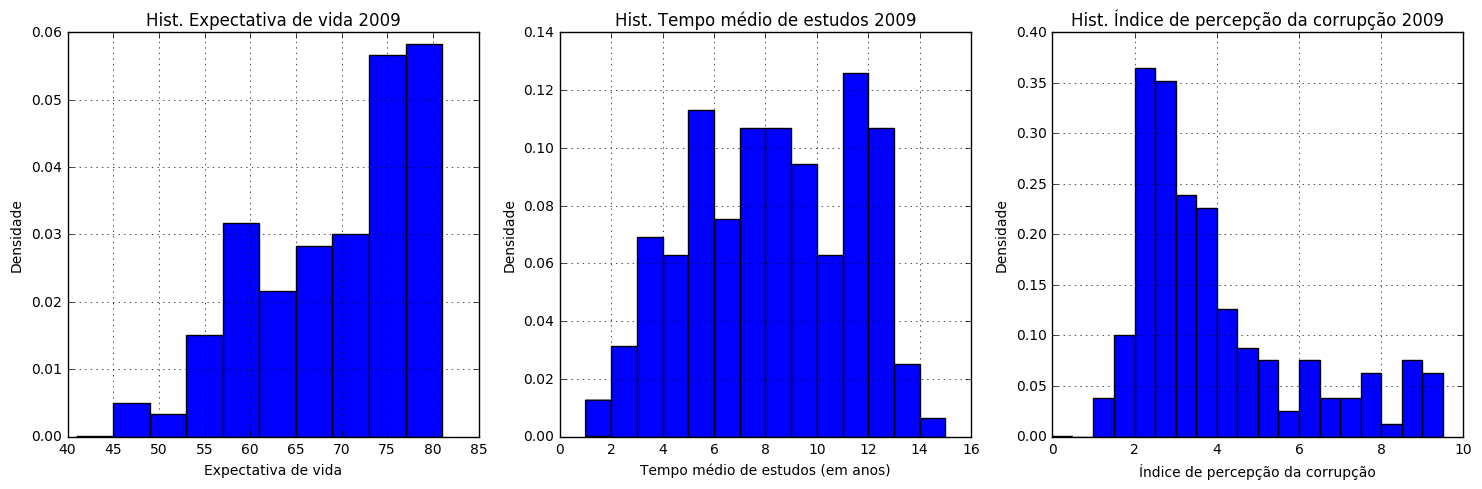

In [62]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
dados.Exp_de_vida.hist(bins=range(41,84,4),normed=1)
plt.xlabel("Expectativa de vida")
plt.ylabel("Densidade")
plt.title("Hist. Expectativa de vida 2009")


plt.subplot(132)
dados.Anos_de_estudo.hist(bins=range(1,16,1),normed=1)
plt.xlabel("Tempo médio de estudos (em anos)")
plt.ylabel("Densidade")
plt.title("Hist. Tempo médio de estudos 2009")

plt.subplot(133)
dados.CPI.hist(bins=np.arange(0,10,0.5),normed=1)
plt.xlabel("Índice de percepção da corrupção")
plt.ylabel("Densidade")
plt.title("Hist. Índice de percepção da corrupção 2009")


plt.tight_layout()
plt.show()

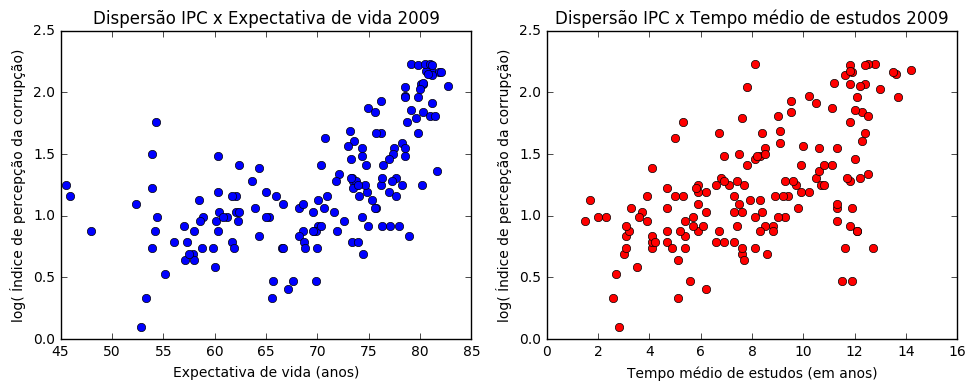

In [64]:
fig = plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(dados.Exp_de_vida,np.log(dados.CPI),"o")
plt.xlabel("Expectativa de vida (anos)")
plt.ylabel("log( Índice de percepção da corrupção)")
plt.title("Dispersão IPC x Expectativa de vida 2009")

plt.subplot(122)
plt.plot(dados.Anos_de_estudo,np.log(dados.CPI),"o",color="red")
plt.ylabel("log( Índice de percepção da corrupção)")
plt.xlabel("Tempo médio de estudos (em anos)")
plt.title("Dispersão IPC x Tempo médio de estudos 2009")



plt.tight_layout()
plt.show()

In [38]:
#Linear Regression

Y = dados.CPI
X = dados[["Anos_de_estudo","Exp_de_vida"]]

model = sm.ols(formula= "CPI ~ Anos_de_estudo + Exp_de_vida", data=dados)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     61.62
Date:                Thu, 25 May 2017   Prob (F-statistic):           1.90e-20
Time:                        15:17:29   Log-Likelihood:                -294.78
No. Observations:                 159   AIC:                             595.6
Df Residuals:                     156   BIC:                             604.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -4.5034      1.058     -4.256      0.000        -6.594    -2.413
Anos_de_estudo     0.2061      0.052      3.979      0.000         0.104     0.308
Exp_de_vida        0.0966      0.018      5.290      0.000         0.061     0.133
==============================================================================
Omnibus:                        6.700   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.959
Skew:                           0.500   Prob(JB):                       0.0308
Kurtosis:                       2.774   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""